# Model Selection
This notebook will look at the following models
* Logistic regression (Baseline model)
* Stochastic gradient descent
* Random forest classifier
* XG boost

A nested CV will be used to evaluate the models and finalise the model to be used

## Contents
* [Import libraries and datasets](#Import-libraries-and-datasets)
* [Baseline - Logistic Regression](#Baseline---Logistic-Regression)
* [Nested CV for model evaluation and selection](#Nested-CV-for-model-evaluation-and-selection)

## Import libraries and datasets

In [24]:
# Import libraries
import pandas as pd # For placing the data into dataframes for analysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools as itl
import sklearn
import pickle
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, make_scorer, plot_roc_curve, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline


# Fix display settings for viewing output
pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 400)

In [2]:
# Import training datasets
X_train = pd.read_csv("../datasets/X_train.csv")
y_train = pd.read_csv("../datasets/y_train.csv")

In [3]:
# Check on imported X train
X_train.head()

,loan_amnt,term,int_rate,inq_last_6mths,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_rev_tl_bal_gt_0,percent_bc_gt_75,tot_hi_cred_lim,total_dti_consol,sub_grade_d,fico_median,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,28000.0,60.0,10.78,1.0,3.0,8.0,31708.0,253.0,6.0,5.0,6.0,4.0,16.7,426839.0,22.72,24,767.0,1,0,0,0,0,0
1,5000.0,36.0,7.62,0.0,0.0,2.0,7483.0,341.0,6.0,5.0,69.0,3.0,0.0,319093.0,14.13,13,717.0,1,0,0,0,0,1
2,15000.0,36.0,7.89,0.0,0.0,4.0,7260.0,175.0,7.0,1.0,25.0,4.0,25.0,316999.0,6.55,15,707.0,1,0,0,0,0,0
3,15000.0,36.0,12.74,0.0,2.0,4.0,4647.0,380.0,11.0,1.0,20.0,5.0,33.3,68940.0,23.11,31,697.0,1,0,0,0,1,0
4,20000.0,36.0,8.39,0.0,0.0,0.0,294.0,233.0,30.0,5.0,92.0,13.0,100.0,24700.0,8.54,15,672.0,1,0,0,0,0,1


In [4]:
# Check datatype of X_train
X_train.dtypes

loan_amnt                              float64
term                                   float64
int_rate                               float64
inq_last_6mths                         float64
inq_last_12m                           float64
acc_open_past_24mths                   float64
bc_open_to_buy                         float64
mo_sin_old_rev_tl_op                   float64
mo_sin_rcnt_tl                         float64
mort_acc                               float64
mths_since_recent_bc                   float64
num_rev_tl_bal_gt_0                    float64
percent_bc_gt_75                       float64
tot_hi_cred_lim                        float64
total_dti_consol                       float64
sub_grade_d                              int64
fico_median                            float64
home_ownership_MORTGAGE                  int64
home_ownership_NONE                      int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_

In [5]:
# Check shape of X_train data
X_train.shape

(713403, 23)

In [6]:
# Check on imported y train
y_train.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [7]:
# Check datatype of y_train
y_train.dtypes

loan_status    int64
dtype: object

In [8]:
# Convert to an array for model
y_train = np.ravel(y_train)

In [9]:
# Check shape of y_train data
y_train.shape

(713403,)

### Scale features

In [11]:
# Standard scale features for logistic regression modeling
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

### Baseline - Logistic Regression

AUC score for training baseline mode is 0.72


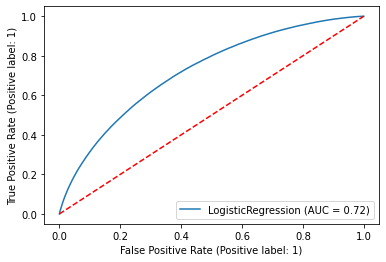

In [28]:
# Instantiate Logistic Regression Classifier
lr = LogisticRegression(class_weight = 'balanced', random_state = 1)

# setting the number of folds
kf = KFold(5)

# Fit Logistic Regression Classifier and compute prediction
base_pred_train = cross_val_score(lr, X_train_sc, y_train, cv=kf, scoring = 'roc_auc')
base_pred_auc = round((base_pred_train.mean()), 3)

# Show AUC score of baseline model
print('AUC score for training baseline mode is ' + str(base_pred_auc))

# Plot ROC AUC curve
lr.fit(X_train_sc, y_train)
plot_roc_curve(lr, X_train_sc, y_train)
plt.plot([0, 1], [0, 1],'r--')
plt.show;

In [60]:
# Sample of training data using the train test split
X_nil, X_train_ss, y_nil, y_train_ss = train_test_split(X_train, y_train, test_size=.2, random_state=42, stratify=y_train)

In [61]:
print(X_train_ss.shape)
print(y_train_ss.shape)

(142681, 23)
(142681,)


In [36]:
# Import validation datasets
X_val = pd.read_csv("../datasets/X_val.csv")
y_val = pd.read_csv("../datasets/y_val.csv")

## Nested CV for model evaluation and selection

In [62]:
# Initializing Classifiers
clf1 = SGDClassifier(loss = 'log',
                     penalty = 'elasticnet',
                     class_weight = 'balanced',
                     n_jobs = -1,
                     random_state=1)

clf2 = RandomForestClassifier(class_weight = 'balanced', random_state=1)

clf3 = xgb(verbosity = 0, scale_pos_weight=80, random_state=1)

# Building the pipelines
pipe1 = Pipeline([('std', StandardScaler()),
                  ('clf1', clf1)])

# Setting up the parameter grids
param_grid1 = [{'clf1__l1_ratio': [0, 0.5, 1],
                'clf1__alpha': [0.01, 1, 10]}]

param_grid2 = [{'class_weight': ['balanced'],
                'n_estimators': [50, 100, 200],
                'criterion': ['gini', 'entropy']}]

param_grid3 = [{'clf4__min_child_weight': [1, 5, 10],
                'clf4__gamma': [0.5, 1, 2],
                'clf4__subsample': [0.6, 1.0],
                'clf4__max_depth': [3, 5]}]

# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}

for pgrid, est, name in zip((param_grid1, param_grid2, param_grid3),
                            (pipe1, clf2, clf3),
                            ('SGD-log', 'RandForest', 'XG Boost')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='roc_auc',
                       n_jobs=1,
                       cv=2,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [63]:
%%time
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train_ss, 
                                   y=y_train_ss, 
                                   cv=outer_cv,
                                   n_jobs=1)
    print('%s | AUC %.4f' %
          (name, nested_score.mean()))

RandForest | AUC 0.7153
SGD-log | AUC 0.7204


/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/garethloh/anaconda3/envs/cap/lib/python3.8/si

XG Boost | AUC 0.6958
CPU times: user 2h 4min 56s, sys: 8min 4s, total: 2h 13min
Wall time: 31min 15s


In [64]:
# Fitting a model to the whole training set
# using the "best" algorithm
best_algo = gridcvs['SGD-log']

best_algo.fit(X_train_ss, y_train_ss)
train_acc = roc_auc_score(y_true=y_train_ss, y_score=best_algo.predict(X_train_ss))
val_acc = roc_auc_score(y_true=y_val, y_score=best_algo.predict(X_val))

print('AUC %.4f (average over CV test folds)' %
      (best_algo.best_score_))
print('Best Parameters: %s' % gridcvs['SGD-log'].best_params_)
print('Training AUC: %.4f' % (train_acc))
print('Validation AUC: %.4f' % (val_acc))

AUC 0.7202 (average over CV test folds)
Best Parameters: {'clf1__alpha': 0.01, 'clf1__l1_ratio': 0}
Training AUC: 0.6601
Validation AUC: 0.6606


Based on the above, the Stochastic Gradient Descent Classifier seems to have the best AUC score.
Hence, the model will be fitted with the best parameters shown in the next notebook